# This notebook is used to graph plots and utilze my graphing class

In [1]:
import sys
import os
FILE_DIRECTORY = os.path.realpath('')
ROOT_DIRECTORY = os.path.split(FILE_DIRECTORY)[0]
SRC_DIRECTORY = os.path.join(ROOT_DIRECTORY,'src')
MODEL_DIRECTORY = os.path.join(ROOT_DIRECTORY,'model')
IMGS_DIRECTORY = os.path.join(ROOT_DIRECTORY,'images')
WRONG_IMGS_DIRECTORY = os.path.join(IMGS_DIRECTORY,'model_wrong_images')
MODEL1_WRONG_IMGS_DIRECTORY = os.path.join(WRONG_IMGS_DIRECTORY,'Model_V1_wrong_images')
MODEL2_WRONG_IMGS_DIRECTORY = os.path.join(WRONG_IMGS_DIRECTORY,'Model_V2_wrong_images')
sys.path.append(ROOT_DIRECTORY)
sys.path.append(SRC_DIRECTORY)
sys.path.append(MODEL_DIRECTORY)
from waldo_plotter import *
%matplotlib inline

In [2]:
df1 = pd.read_csv(os.path.join(MODEL_DIRECTORY,'model_v1_metrics.csv'))

In [3]:
df2 = pd.read_csv(os.path.join(MODEL_DIRECTORY,'model_v2_metrics.csv'))

In [4]:
df3 = pd.read_csv(os.path.join(MODEL_DIRECTORY,'model_v3_metrics.csv'))

In [2]:
df4 = pd.read_csv(os.path.join(MODEL_DIRECTORY,'model_v4_metrics.csv'))

In [6]:
waldo1 = WaldoCNN(9000, 10, 'data/Keras Generated/Train',
                     'data/Keras Generated/Test',
                     'data/Keras Generated/Holdout', 1,
                     load_model=os.path.join(MODEL_DIRECTORY,
                                             'model_v1.h5'))


Found 8050 images belonging to 2 classes.
Found 1936 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [7]:
waldo2 = WaldoCNN(9000, 10, 'data/Keras Generated/Train',
                     'data/Keras Generated/Test',
                     'data/Keras Generated/Holdout', 2,
                     load_model=os.path.join(MODEL_DIRECTORY,
                                             'model_v2.h5'))


Found 8050 images belonging to 2 classes.
Found 1936 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [8]:
waldo3 = WaldoCNN(9000, 10, 'data/Keras Generated/New_Train',
                     'data/Keras Generated/Test',
                     'data/Keras Generated/Holdout', 2,
                     load_model=os.path.join(MODEL_DIRECTORY,
                                             'model_v3.h5'))


Found 19982 images belonging to 2 classes.
Found 1936 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [9]:
waldo4 = WaldoCNN(9000, 10, 'data/Keras Generated/New_Train',
                     'data/Keras Generated/Test',
                     'data/Keras Generated/Holdout', 2,
                     load_model=os.path.join(MODEL_DIRECTORY,
                                             'model_v4.h5'))

Found 19982 images belonging to 2 classes.
Found 1936 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [10]:
waldoplt1 = WaldoPlotter(df1, waldo1 ,[0.583, 0.905])
waldoplt2 = WaldoPlotter(df2, waldo2 ,[0.584,0.952])
waldoplt3 = WaldoPlotter(df3, waldo3 ,[1.143,9.0])
waldoplt4 = WaldoPlotter(df4, waldo4 ,[0.0019,1.0])

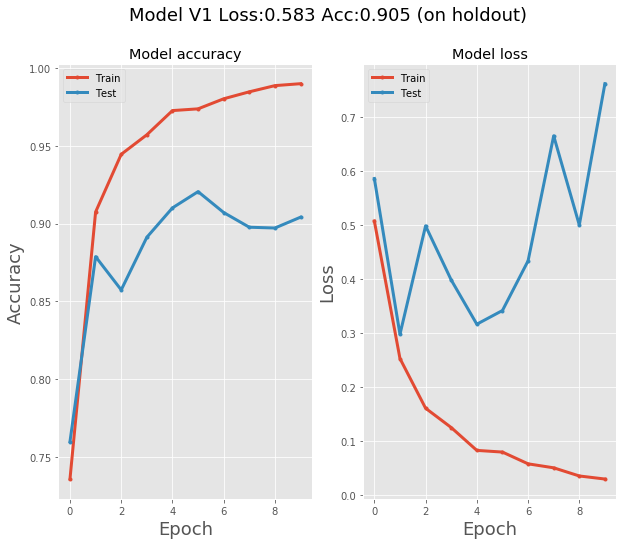

In [11]:
waldoplt1.create_accuracy_loss(os.path.join(IMGS_DIRECTORY,'model_V1_plot.jpg'))

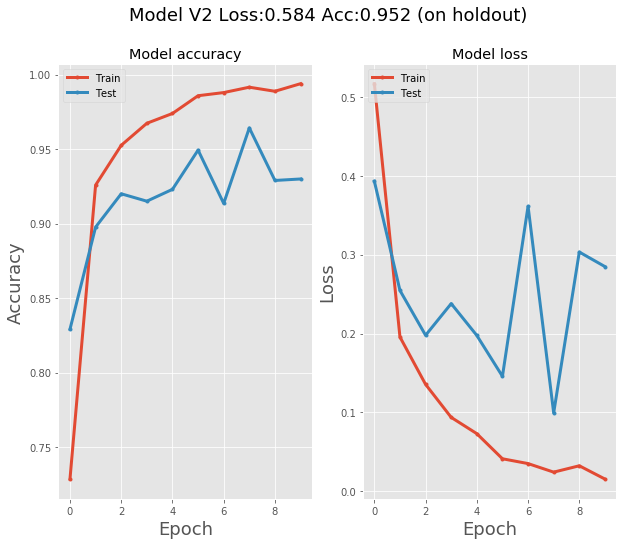

In [12]:
waldoplt2.create_accuracy_loss(os.path.join(IMGS_DIRECTORY,'model_V2_plot.jpg'))

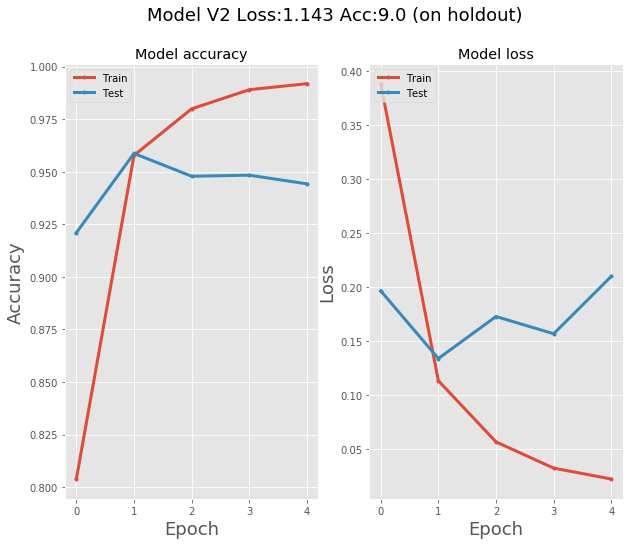

In [13]:
waldoplt3.create_accuracy_loss(os.path.join(IMGS_DIRECTORY,'model_V3_plot.jpg'))

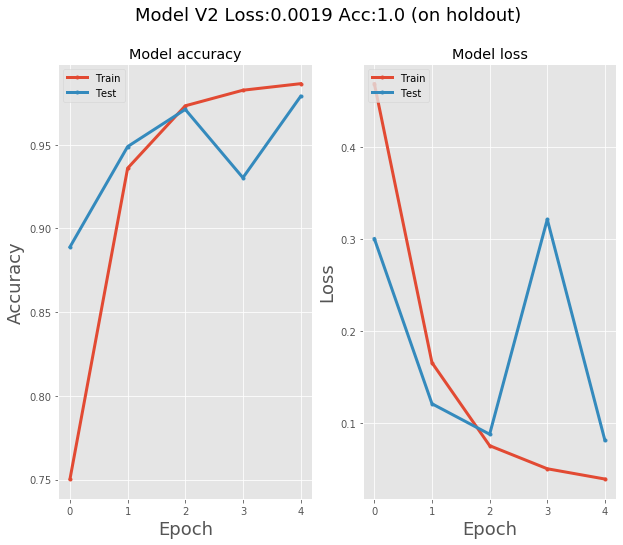

In [14]:
waldoplt4.create_accuracy_loss(os.path.join(IMGS_DIRECTORY,'model_V4_plot.jpg'))

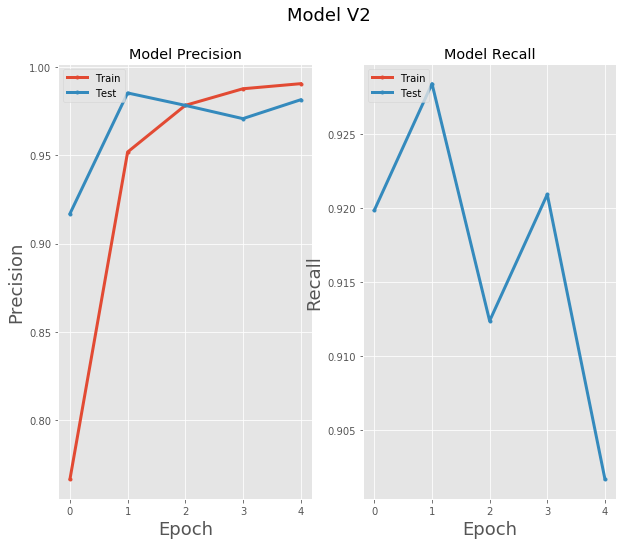

In [15]:
waldoplt3.create_precision_accuracy(os.path.join(IMGS_DIRECTORY,'model_V3_plot_recall.jpg'))

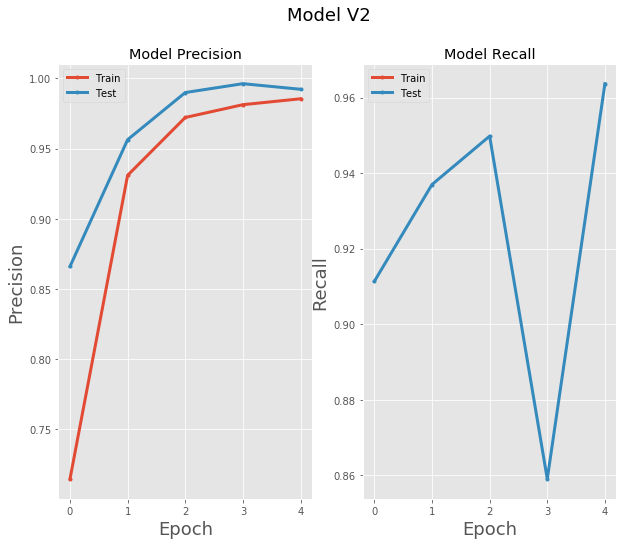

In [16]:
waldoplt4.create_precision_accuracy(os.path.join(IMGS_DIRECTORY,'model_V4_plot_recall.jpg'))

In [7]:
waldoplt1.find_wrong_imgs(MODEL1_WRONG_IMGS_DIRECTORY)

In [8]:
waldoplt2.find_wrong_imgs(MODEL2_WRONG_IMGS_DIRECTORY)

In [13]:
waldo4.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolution-1 (Conv2D)       (None, 63, 63, 64)        832       
_________________________________________________________________
Convolution-2 (Conv2D)       (None, 62, 62, 64)        16448     
_________________________________________________________________
Pooling-1 (MaxPooling2D)     (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
Convolution-3 (Conv2D)       (None, 30, 30, 128)       32896     
_________________________________________________________________
Convolution-4 (Conv2D)       (None, 29, 29, 128)       65664     
_________________________________________________________________
Pooling-2 (MaxPooling2D)     (None, 14, 14, 128)       0

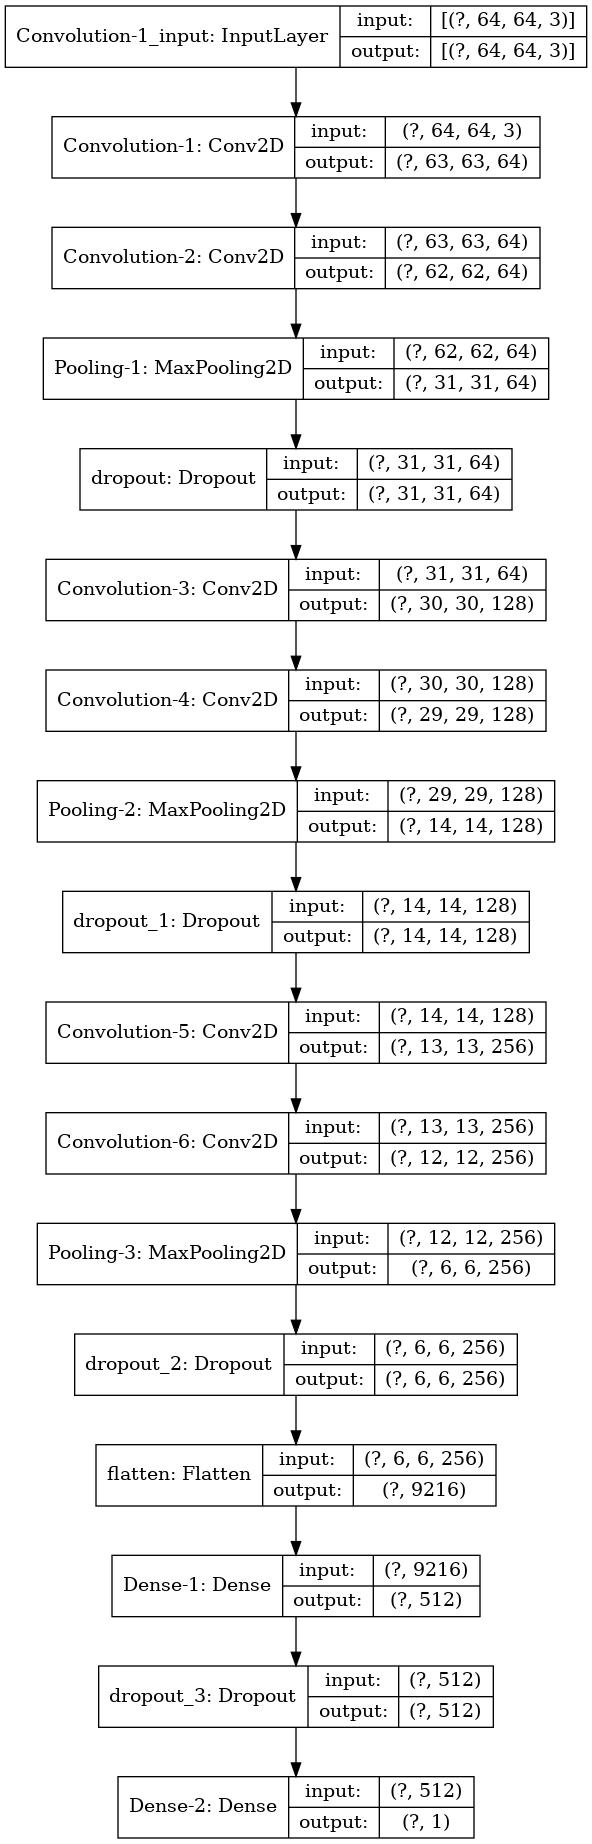

In [12]:
waldoplt4.plot_model_structure(os.path.join(IMGS_DIRECTORY,'struct.jpg'))

In [7]:
df4['val_recall'].tolist()

[0.9113247999999999,
 0.9369658000000002,
 0.9497863000000001,
 0.85897434,
 0.9636752000000001]

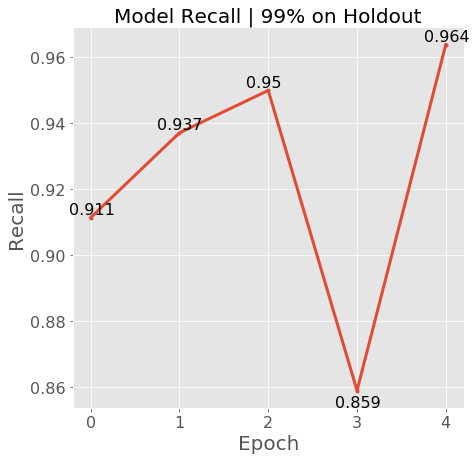

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
plt.plot(df4['val_recall'], lw=3, marker='.')
ax.set_ylabel('Recall', fontsize=20)
ax.set_xlabel('Epoch', fontsize=20)
ax.set_title('Model Recall | 99% on Holdout', fontsize=20)
plt.xticks([0,1,2,3,4], fontsize=16)
plt.yticks(fontsize=16)
locs,_ =plt.xticks()
for i in [0,1,2,3,4]:
    if i==3:
        plt.text(x = locs[i]-0.25 , y = df4['val_recall'].tolist()[i]-.005, s = round(df4['val_recall'].tolist()[i],3), size = 16)
    else:
        plt.text(x = locs[i]-0.25 , y = df4['val_recall'].tolist()[i]+.001, s = round(df4['val_recall'].tolist()[i],3), size = 16)
    
        
plt.savefig(os.path.join(IMGS_DIRECTORY,'plot_img.jpg'))

In [ ]:
f, ax = plt.subplots(figsize=(18,10)) 
plt.bar(genre_list_r,avg_rating)
locs,_ =plt.xticks(rotation=70)
plt.title('Average Rating per Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Rating')
for i in range(len(genre_list_r)):
    plt.text(x = locs[i]-0.3 , y = avg_rating[i]+.05, s = round(avg_rating[i],2), size = 16)
plt.tight_layout()
plt.savefig(os.path.join(IMAGES_DIR,'avg_rating_genre.jpg'))